In [1]:
import pandas as pd
import numpy as np
lol = pd.read_csv('luveri_survey.csv')
lol = lol[lol['RequesterFeedback'].isnull()]
lol = lol[lol['Answer.inNo.on'] == False]
lol = lol.reset_index(drop=True)
lol.shape

(201, 79)

In [2]:
features = [
'Answer.longYes.on',


'Answer.asian.on', 'Answer.white.on','Answer.other.on','Answer.hislatin.on','Answer.mix.on','Answer.black.on',
'Answer.belowIncome.on','Answer.aboveIncome.on', 'Answer.middleIncome.on',
'Answer.belowIncomePartner.on','Answer.middleIncomePartner.on','Answer.aboveIncomePartner.on','Answer.mixPartner.on',
'Answer.blackPartner.on','Answer.whitePartner.on','Answer.asianPartner.on','Answer.hislatinPartner.on','Answer.otherPartner.on',
'Answer.school',
'Answer.schoolPartner',
'Answer.work',
'Answer.workPartner',
'Answer.howOld',
'Answer.howOldPartner',

'Answer.call',
'Answer.confident',
'Answer.future', 
'Answer.leisure',
'Answer.appYes.on',
'Answer.love',
'Answer.nameYes.on',
'Answer.specialDay',
'Answer.text',
'Answer.without', # Spend time without partners

'Answer.luveri.cmt', 'Answer.luveri.gallery', 'Answer.luveri.home',
'Answer.luveri.map', 'Answer.luveri.note', 'Answer.luveri.timeline',
'Answer.luveri.watch','Answer.luveri.chat',
]

In [3]:
def mutual_information( feature,label):
    
    allvalues = list(set(lol[feature]))
    alllabels = list(set(lol[label]))
    
    x = len(alllabels)
    y = len(allvalues)
    
    size = lol.shape[0]
    
    distribution_table = np.zeros([x, y])
    for i in range(x):
        for j in range(y):
            distribution_table[i][j] = np.sum((lol[label] == alllabels[i]) & (lol[feature] == allvalues[j]))/size
            
    marginalx = np.sum(distribution_table, axis = 1)
    marginaly = np.sum(distribution_table, axis = 0)
    distribution_table[distribution_table==0] =1
    marginalx[marginalx == 0] = 1

    marginaly[marginaly == 0] = 1
    
    Hxy = np.sum(- distribution_table * np.log(distribution_table))
    Hx = np.sum(- marginalx * np.log(marginalx))
    Hy = np.sum(- marginaly * np.log(marginaly))
    return Hx + Hy -Hxy

In [4]:
from scipy.stats import chi2_contingency

def independence(feature,label):

    allvalues = list(set(lol[feature]))
    alllabels = list(set(lol[label]))
    x = len(alllabels)
    y = len(allvalues)
    size = lol.shape[0]
    distribution_table = np.zeros([x, y])

    for i in range(x):
        for j in range(y):
            distribution_table[i][j] = np.sum((lol[label] == alllabels[i]) & (lol[feature] == allvalues[j]))

    return chi2_contingency(distribution_table)[1] # p-value for H0: independence

In [5]:
mutual_information('Answer.love', 'Answer.confident')

0.3811170001850366

In [6]:
lol['years_diff'] = np.abs(lol['Answer.howOld'] - lol['Answer.howOldPartner'])

In [7]:

features += ['years_diff']
label = 'Answer.confident'

measurements = []
shortlist = []
listcorr = []
listpvalue = []

for i in features:
    if len(list(set(lol[i]))) <= 11:
        
        xd = mutual_information(i, label)
        corr = np.corrcoef(lol[label], lol[i])[0][1]
        pvalue = independence(label, i)
        
        listpvalue.append(pvalue)
        listcorr.append(corr)
        measurements.append(xd)
        shortlist.append(i)
    
resultdf = pd.DataFrame()
resultdf['features'] = shortlist
resultdf['Mutual_Information'] = measurements
resultdf['Corr'] = listcorr
resultdf['pvalue'] = listpvalue

resultdf_top10 = resultdf.sort_values(by=['Mutual_Information'],axis=0, ascending=False)
resultdf_top10.drop(34)

,features,Mutual_Information,Corr,pvalue
20,Answer.confident,2.034060,1.000000,0.000000e+00
26,Answer.specialDay,0.493240,0.617947,1.686107e-18
22,Answer.leisure,0.472726,0.512281,4.018918e-18
21,Answer.future,0.401133,0.443235,1.665181e-17
24,Answer.love,0.381117,0.460289,4.355942e-16
19,Answer.call,0.335060,0.272481,8.715662e-08
27,Answer.text,0.317113,0.273128,7.406160e-06
28,Answer.without,0.297877,0.005659,2.504705e-02
23,Answer.appYes.on,0.071308,-0.233246,5.690819e-03
14,Answer.blackPartner.on,0.046867,0.020015,2.350546e-02


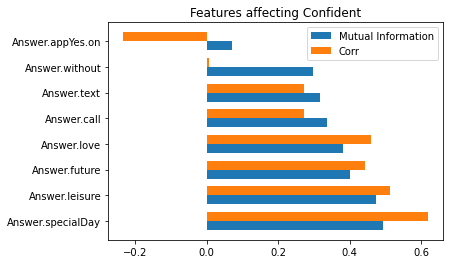

In [8]:
import matplotlib.pyplot as plt

resultdf_top10 = resultdf_top10.drop(34)
N = 8
ind = np.arange(N) 
width = 0.35

data1 = list(resultdf_top10['Mutual_Information'][1:9])
data2 = list(resultdf_top10['features'][1:9])
data3 = list(resultdf_top10['Corr'][1:9])
#resultdf[:10].plot.bar(y='Mutual_Information', x='features')

# plt.barh(data2, data1, label = 'Mutual Information')
# plt.barh(data2, data3, label = 'Corr')
# plt.legend()

plt.barh(ind, data1, width, label='Mutual Information')
plt.barh(ind+width, data3, width, label='Corr')

#plt.ylabel('Features')

plt.yticks(ind + width / 2, data2)
plt.legend(loc='best')
plt.title('Features affecting Confident')
plt.show()

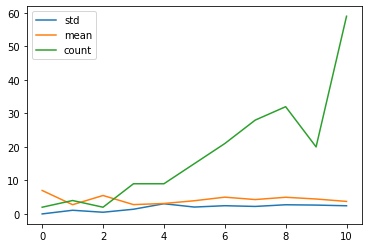

In [9]:
meanlist = []
countlist = []
stdlist = []
for i in range(11):
    meanlist.append(np.mean(lol[lol['Answer.confident'] ==i]['Answer.without'] ))
    countlist.append(lol[lol['Answer.confident']==i].shape[0])
    stdlist.append(np.std((lol[lol['Answer.confident'] ==i]['Answer.without'] )))
    
plt.plot(stdlist, label='std')
plt.plot(meanlist, label='mean')
plt.plot(countlist, label='count')
plt.legend()

In [10]:
pickfeatures = ['Answer.specialDay', 'Answer.leisure', 'Answer.future', 'Answer.love',
                 'Answer.call', 'Answer.text', 'Answer.without', 
                 'Answer.appYes.on']
lol[pickfeatures].corr()

,Answer.specialDay,Answer.leisure,Answer.future,Answer.love,Answer.call,Answer.text,Answer.without,Answer.appYes.on
Answer.specialDay,1.000000,0.629621,0.544899,0.465530,0.363188,0.360469,-0.004970,-0.027509
Answer.leisure,0.629621,1.000000,0.393422,0.459270,0.383983,0.389097,0.084442,-0.061389
Answer.future,0.544899,0.393422,1.000000,0.465016,0.447070,0.467446,0.103540,-0.000174
Answer.love,0.465530,0.459270,0.465016,1.000000,0.441877,0.614418,0.075869,-0.201559
Answer.call,0.363188,0.383983,0.447070,0.441877,1.000000,0.429291,0.047215,0.026151
Answer.text,0.360469,0.389097,0.467446,0.614418,0.429291,1.000000,0.124226,-0.001100
Answer.without,-0.004970,0.084442,0.103540,0.075869,0.047215,0.124226,1.000000,0.096686
Answer.appYes.on,-0.027509,-0.061389,-0.000174,-0.201559,0.026151,-0.001100,0.096686,1.000000


In [11]:
shortfeatures = ['Answer.specialDay', 'Answer.call', 'Answer.without', 'Answer.appYes.on']


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = lol[shortfeatures]
y = lol['Answer.confident']
regr = linear_model.LinearRegression()

regr.fit(X, y)

y_pred = regr.predict(X)

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Mean squared error: 3.39
Coefficient of determination: 0.43


In [13]:
regr.coef_

array([ 0.56971961,  0.05361383,  0.02632814, -1.09142708])

In [15]:
regr.intercept_

3.5963070097798164

In [34]:

features += ['years_diff']
label = 'Answer.love'

measurements = []
shortlist = []
listcorr = []
listpvalue = []

for i in features:
    if len(list(set(lol[i]))) <= 11:
        
        xd = mutual_information(i, label)
        corr = np.corrcoef(lol[label], lol[i])[0][1]
        pvalue = independence(label, i)
        
        listpvalue.append(pvalue)
        listcorr.append(corr)
        measurements.append(xd)
        shortlist.append(i)
    
resultdf = pd.DataFrame()
resultdf['features'] = shortlist
resultdf['Mutual_Information'] = measurements
resultdf['Corr'] = listcorr
resultdf['pvalue'] = listpvalue

resultdf_top10 = resultdf.sort_values(by=['Mutual_Information'],axis=0, ascending=False)
resultdf_top10

,features,Mutual_Information,Corr,pvalue
24,Answer.love,1.551894,1.000000,0.000000e+00
27,Answer.text,0.489674,0.614418,3.442441e-26
21,Answer.future,0.422186,0.465016,3.283094e-18
22,Answer.leisure,0.395366,0.459270,1.134061e-08
19,Answer.call,0.393729,0.441877,5.923039e-12
20,Answer.confident,0.381117,0.460289,4.355942e-16
26,Answer.specialDay,0.348109,0.465530,1.176634e-07
28,Answer.without,0.228019,0.075869,7.330261e-01
23,Answer.appYes.on,0.094726,-0.201559,6.617396e-04
35,Answer.luveri.watch,0.061588,0.148704,5.647862e-05


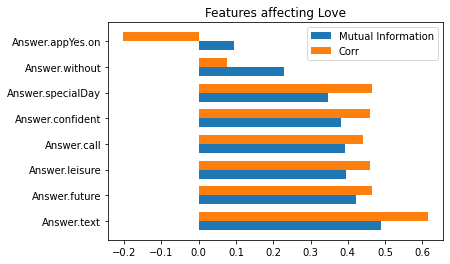

In [36]:
import matplotlib.pyplot as plt

N = 8
ind = np.arange(N) 
width = 0.35

data1 = list(resultdf_top10['Mutual_Information'][1:9])
data2 = list(resultdf_top10['features'][1:9])
data3 = list(resultdf_top10['Corr'][1:9])
#resultdf[:10].plot.bar(y='Mutual_Information', x='features')

# plt.barh(data2, data1, label = 'Mutual Information')
# plt.barh(data2, data3, label = 'Corr')
# plt.legend()

plt.barh(ind, data1, width, label='Mutual Information')
plt.barh(ind+width, data3, width, label='Corr')

#plt.ylabel('Features')

plt.yticks(ind + width / 2, data2)
plt.legend(loc='best')
plt.title('Features affecting Love')
plt.show()

In [56]:
pickfeatures2 = ['Answer.text', 'Answer.future', 'Answer.leisure', 'Answer.call', 'Answer.specialDay', 'Answer.without',
                'Answer.appYes.on']
lol[pickfeatures2].corr()

,Answer.text,Answer.future,Answer.leisure,Answer.call,Answer.specialDay,Answer.without,Answer.appYes.on
Answer.text,1.000000,0.467446,0.389097,0.429291,0.360469,0.124226,-0.001100
Answer.future,0.467446,1.000000,0.393422,0.447070,0.544899,0.103540,-0.000174
Answer.leisure,0.389097,0.393422,1.000000,0.383983,0.629621,0.084442,-0.061389
Answer.call,0.429291,0.447070,0.383983,1.000000,0.363188,0.047215,0.026151
Answer.specialDay,0.360469,0.544899,0.629621,0.363188,1.000000,-0.004970,-0.027509
Answer.without,0.124226,0.103540,0.084442,0.047215,-0.004970,1.000000,0.096686
Answer.appYes.on,-0.001100,-0.000174,-0.061389,0.026151,-0.027509,0.096686,1.000000


In [16]:
shortfeatures2 = ['Answer.text', 'Answer.without', 'Answer.appYes.on']

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = lol[shortfeatures2]
y = lol['Answer.love']
regr = linear_model.LinearRegression()

regr.fit(X, y)

y_pred = regr.predict(X)

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Mean squared error: 4.02
Coefficient of determination: 0.42


In [18]:
regr.coef_

array([ 0.60090057,  0.02040345, -1.07469723])

<AxesSubplot:>

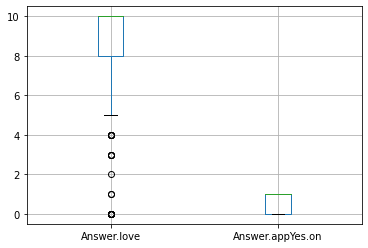

In [40]:
lol.boxplot(column= ['Answer.love', 'Answer.appYes.on'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b758012c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1b75801f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b758012910>,
 'medians': [<matplotlib.lines.Line2D at 0x1b75801fa60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b75801fdc0>,
 'means': []}

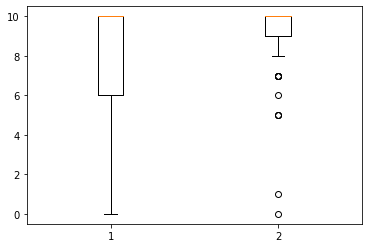

In [44]:
data1 = lol[lol['Answer.appYes.on'] == True]['Answer.love']
data2 = lol[lol['Answer.appYes.on'] == False]['Answer.love']

data = [data1, data2]
plt.boxplot(data)

In [50]:
lol[(lol['Answer.appYes.on'] == False) & (lol['Answer.love'] == 0) ]['Answer.confident']

144    10
Name: Answer.confident, dtype: int64

In [58]:
lol[(lol['Answer.appYes.on'] == False) & (lol['Answer.love'] == 5) ]['Answer.confident']

84     6
88     7
182    4
Name: Answer.confident, dtype: int64

In [59]:
lol[(lol['Answer.appYes.on'] == False) & (lol['Answer.love'] == 6) ]['Answer.confident']

36    5
Name: Answer.confident, dtype: int64

In [60]:
lol[(lol['Answer.appYes.on'] == False) & (lol['Answer.love'] == 7) ]['Answer.confident']

46      6
67      6
90      8
105    10
107     6
Name: Answer.confident, dtype: int64

In [61]:
lol[(lol['Answer.appYes.on'] == True) & (lol['Answer.love'] == 0) ]['Answer.confident']

24      5
43      6
108     6
130     1
143     8
171    10
184     6
Name: Answer.confident, dtype: int64

In [77]:
data1 = lol[lol['Answer.appYes.on'] == True]
xd = data1.groupby('Answer.love').count()['years_diff']


Answer.love
0      7
1      1
2      1
3      4
4      5
5      4
6     11
8      9
9      8
10    63
Name: years_diff, dtype: int64

In [78]:
data2 = lol[lol['Answer.appYes.on'] == False]
xd = data2.groupby('Answer.love').count()['years_diff']
xd

Answer.love
0      1
1      1
5      3
6      1
7      5
8      9
9     18
10    50
Name: years_diff, dtype: int64

In [82]:
remove_a_bit = lol[lol['Answer.love'] >= 5]
np.corrcoef(remove_a_bit['Answer.love'], remove_a_bit['Answer.appYes.on'])[0][1]

-0.04668958345439323